## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

In [3]:
import json
import numpy as np
from collections import defaultdict
with open('D:\GIT1\Homework\src\hw4_data.json', 'r') as f:
    data = json.load(f)
    
nodes = data['nodes']
edges = data['edges']
friends_dict = defaultdict(list) #创建一个字典记录每一个用户的直接朋友

node_names = [node[0] for node in nodes]   
num_nodes = len(node_names)
node_index = {name: idx for idx, name in enumerate(node_names)}  #节点名称映射到它们的索引
influence_scores = {node[0]:node[1] for node in nodes}       #创建一个用户影响分数的字典

adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=float) 

for edge in edges:
    src, tgt, weight = edge
    src_idx = node_index[src]
    tgt_idx = node_index[tgt]
    adjacency_matrix[src_idx][tgt_idx] = weight
    adjacency_matrix[tgt_idx][src_idx] = weight
    friends_dict[src].append(tgt)
    friends_dict[tgt].append(src)

friends_dict = dict(friends_dict)

print(adjacency_matrix)

for user,friends in friends_dict.items():
    print(f"{user}:{friends}")

[[ 0.   25.3  25.09  9.62  2.1   0.    0.    0.    0.    1.14  0.    0.
   0.86 11.85  7.25  2.34  0.    0.    0.    0.    0.    0.    4.25  4.5
   0.    0.    3.11  7.39  3.61  0.    0.  ]
 [25.3   0.   24.84  6.4   0.97  0.    0.    0.    0.    0.    0.    0.
   0.   11.92  6.58  0.    0.    0.    0.    0.    0.    0.    4.55  4.84
   0.    0.    3.27  7.73  3.82  0.    0.  ]
 [25.09 24.84  0.   12.48  3.96  3.27  2.52  2.1   0.    3.56  1.5   0.
   4.11 13.85  8.1   3.86  2.36  0.    1.33  1.09  2.24  0.    4.66  4.97
   0.    0.    3.32  7.63  3.9   1.    2.1 ]
 [ 9.62  6.4  12.48  0.   11.87  9.15  7.73  6.96  6.85 15.28  7.93  6.54
   9.84  7.15  4.1  10.64  7.32  2.32  5.19  7.84  5.09  3.51  3.21  3.35
   4.19  3.05  2.51  3.87  2.83  2.84  2.96]
 [ 2.1   0.97  3.96 11.87  0.    7.62  5.33  8.44  6.84  6.29  9.52  1.51
   6.4   1.77  0.89  5.48  7.29  1.2   6.71  5.92  2.84  1.26  0.84  0.85
   1.34  1.2   0.78  0.88  0.81  1.09  0.89]
 [ 0.    0.    3.27  9.15  7.62  0.   10.8

In [12]:
import json
import numpy as np
from collections import defaultdict
with open('D:\GIT1\Homework\src\hw4_data.json', 'r') as f:
    data = json.load(f)
    
nodes = data['nodes']
edges = data['edges']
friends_dict = defaultdict(list) #创建一个字典记录每一个用户的直接朋友

node_names = [node[0] for node in nodes]   
num_nodes = len(node_names)
node_index = {name: idx for idx, name in enumerate(node_names)}  #创建一个字典，节点名称映射到它们的索引
influence_scores = {node[0]:node[1] for node in nodes}       #创建一个用户影响分数的字典

adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=float) 

for edge in edges:
    src, tgt, weight = edge
    src_idx = node_index[src]
    tgt_idx = node_index[tgt]
    adjacency_matrix[src_idx][tgt_idx] = weight
    adjacency_matrix[tgt_idx][src_idx] = weight
    friends_dict[src].append(tgt)
    friends_dict[tgt].append(src)
    
friends_dict = dict(friends_dict)
degree_dict = {user:len(friends) for user,friends in friends_dict.items()} #创建一个字典，用于计算和存储每个用户的直接朋友数量

top5_degree = sorted(degree_dict.items(),key=lambda x:x[1],reverse=True)[:5]
print("度数最多的前5个用户及其朋友数量:")
for user,degree in top5_degree:
    print(f"{user}:{degree}")

top5_influence = sorted(influence_scores.items(),key=lambda x:x[1],reverse=True)[:5]
print("\n影响力最高的前5个用户:")
for user,influence in top5_influence:
    print(f"{user}:{influence}")
    
combine_scores = {}
for user in influence_scores.keys():
    degree = degree_dict.get(user,0)
    influence = influence_scores[user]
    combine_scores[user]=0.5*degree+0.5*influence
top5_combinescores = sorted(combine_scores.items(),key=lambda x:x[1],reverse=True)[:5]
print("\n综合分数最高的五个用户:")
for user,score in top5_combinescores:
    print(f"{user}:{score}")

度数最多的前5个用户及其朋友数量:
tyn1998:30
frank-zsy:30
pomelo-nwu:24
andyhuang18:23
wj23027:23

影响力最高的前5个用户:
Yanyan-Wang:50.95
Aarebecca:23.82
pomelo-nwu:22.36
tyn1998:16.64
frank-zsy:15.8

综合分数最高的五个用户:
Yanyan-Wang:32.475
tyn1998:23.32
pomelo-nwu:23.18
frank-zsy:22.9
Aarebecca:17.41


In [18]:
import json
import numpy as np
from collections import defaultdict
with open('D:\GIT1\Homework\src\hw4_data.json', 'r') as f:
    data = json.load(f)
    
nodes = data['nodes']
edges = data['edges']
friends_dict = defaultdict(list) #创建一个字典记录每一个用户的直接朋友

node_names = [node[0] for node in nodes]   
num_nodes = len(node_names)
node_index = {name: idx for idx, name in enumerate(node_names)}  #创建一个字典，节点名称映射到它们的索引
influence_scores = {node[0]:node[1] for node in nodes}       #创建一个用户影响分数的字典

adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=float) 

for edge in edges:
    src, tgt, weight = edge
    src_idx = node_index[src]
    tgt_idx = node_index[tgt]
    adjacency_matrix[src_idx][tgt_idx] = weight
    adjacency_matrix[tgt_idx][src_idx] = weight
    friends_dict[src].append(tgt)
    friends_dict[tgt].append(src)
    
friends_dict = dict(friends_dict)
degree_dict = {user:len(friends) for user,friends in friends_dict.items()}

user="Yanyan-Wang"
friends_of_user = friends_dict.get(user,[])    #找到yanyuan_wang的直接朋友
potential_friends_of_user = defaultdict(int)

for friend in friends_of_user:
    for friend_of_friend in friends_dict.get(friend,[]):
        if friend_of_friend!=user and friend_of_friend not in friends_of_user:
            potential_friends_of_user[friend_of_friend]+=1
most_possible_friend = sorted(potential_friends_of_user.items(),key=lambda x:x[1],reverse=True)
print(f"推荐给{user}的新朋友:")
for friend,common_friend in most_possible_friend:
    print(f"{friend}:有{common_friend}个共同朋友")
connection_strength = defaultdict(float)

user_of_connection_strength = defaultdict(float)
for edge in edges:
    src,tgt,weight=edge
    if src==user:
        connection_strength[(user,tgt)] += weight
    if tgt==user:
        connection_strength[(src, user)] += weight 
top5_strength = sorted(connection_strength.items(),key=lambda x:x[1],reverse=True)[:5]
print(f"\n与{user}联系最强的五个用户：")
for (scr,tgt),strength in top5_strength:
    print(f"{tgt}:连接强度{strength}")

推荐给Yanyan-Wang的新朋友:
will-ww:有6个共同朋友
zhicheng-ning:有6个共同朋友
PureNatural:有6个共同朋友
xiaoya-yaya:有6个共同朋友
xgdyp:有6个共同朋友
longyanz:有6个共同朋友
Zzzzzhuzhiwei:有6个共同朋友
birdflyi:有6个共同朋友
lhbvvvvv:有6个共同朋友
zhaosj975:有6个共同朋友
stevending1st:有5个共同朋友
wxharry:有4个共同朋友
pranavshuklaa:有4个共同朋友
stealth-bombeer:有4个共同朋友
Vlad116:有4个共同朋友
kunal8411:有4个共同朋友

与Yanyan-Wang联系最强的五个用户：
Aarebecca:连接强度25.3
pomelo-nwu:连接强度25.09
Yanyan-Wang:连接强度11.85
Yanyan-Wang:连接强度9.62
Yanyan-Wang:连接强度7.39


C:\Users\86139\AppData\Local\Temp\ipykernel_17184\1393855419.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='影响力得分')


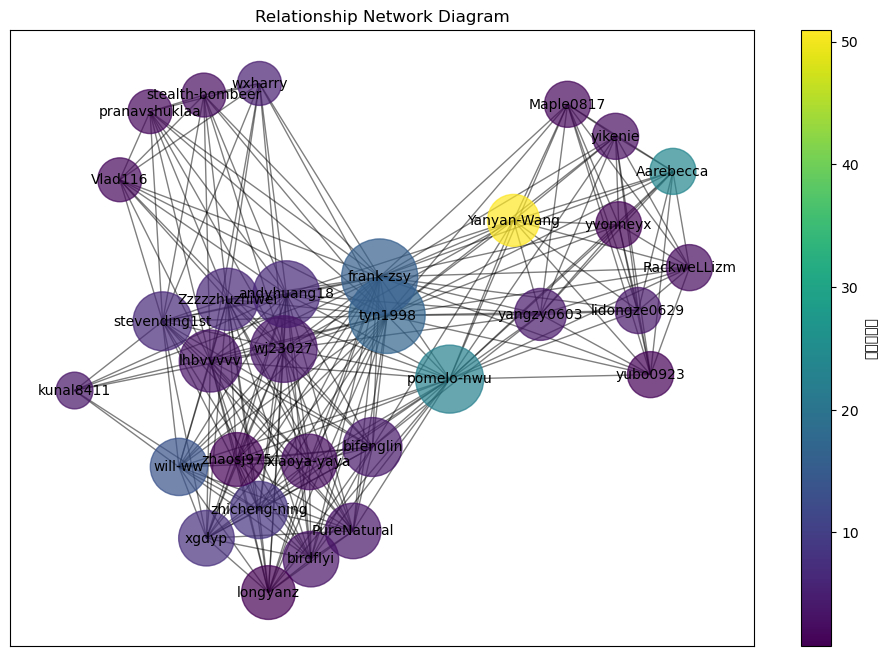

In [28]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

with open('D:\GIT1\Homework\src\hw4_data.json', 'r') as f:
    data = json.load(f)
nodes = data['nodes']
edges = data['edges']
G = nx.Graph()
influence_scores = {node[0]: node[1] for node in nodes}
for node in nodes:
    G.add_node(node[0], influence=influence_scores[node[0]])

for edge in edges:
    src, tgt, _ = edge
    G.add_edge(src, tgt)

degree_dict = dict(G.degree()) #计算每个节点的度数
node_sizes = [degree_dict[node] * 100 for node in G.nodes()]  #节点大小：度数,放大度数值以便可视化
node_colors = [influence_scores[node] for node in G.nodes()]  #节点颜色：影响力得分

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='影响力得分')
plt.title("Relationship Network Diagram")
plt.show()


#### 在图中节点大，并且颜色浅的人在社交网络中更具有影响力，他们不仅有更多的朋友，影响力也较高，节点大小越大，表明朋友越多；节点颜色越浅，表明影响力越大
#### 比如Yanyan-Wang frank-zsy tyn1998 在社交网络中都比较有社交影响力